# **DATA PREPROCESSING**
EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,root_mean_squared_error



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_dataset_UPDATE.csv to Algerian_forest_fires_dataset_UPDATE.csv


In [ ]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' ,header =1)

In [ ]:
df.shape

(246, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:

df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
df[['Region']]=df[['Region']].astype(int)

In [ ]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df = df.drop(122).reset_index(drop=True)

In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()##to remove the extra spaces in the clumns names

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [ ]:
df.to_csv('Algerian_forest_fires_cleaned.csv',index=False)

# **MODEL TRANINING USING DIFF REGRESSION MOELS**

In [ ]:
df_cleaned = pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [ ]:
df_cleaned.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_cleaned.drop(['day','month','year'],axis = 1,inplace = True)

In [ ]:
df_cleaned['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df_cleaned['Classes'] = np.where(df_cleaned['Classes'].str.contains("not fire"),0,1)

In [ ]:
df_cleaned.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df_cleaned.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
125,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1
237,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
203,37,53,14,0.0,89.5,41.1,127.5,8.0,45.5,18.1,1,1
178,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_cleaned.drop('FWI', axis=1),df_cleaned['FWI'],test_size=0.25, random_state = 24)

In [ ]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.635158,-0.255160,-0.348779,0.697300,0.476394,0.389015,0.599777,0.457352,0.516589,0.278417
RH,-0.635158,1.000000,0.249151,0.260732,-0.657263,-0.396969,-0.215512,-0.693199,-0.341312,-0.431879,-0.438105
Ws,-0.255160,0.249151,1.000000,0.181474,-0.174601,0.032702,0.091393,0.033935,0.058278,-0.070398,-0.171204
Rain,-0.348779,0.260732,0.181474,1.000000,-0.572943,-0.292733,-0.304842,-0.358045,-0.304576,-0.392226,-0.028443
FFMC,0.697300,-0.657263,-0.174601,-0.572943,1.000000,0.591691,0.509187,0.740301,0.584029,0.779542,0.210564
DMC,0.476394,-0.396969,0.032702,-0.292733,0.591691,1.000000,0.884036,0.672953,0.983517,0.581726,0.212319
DC,0.389015,-0.215512,0.091393,-0.304842,0.509187,0.884036,1.000000,0.497457,0.944189,0.513455,-0.059288
ISI,0.599777,-0.693199,0.033935,-0.358045,0.740301,0.672953,0.497457,1.000000,0.636530,0.741823,0.281607
BUI,0.457352,-0.341312,0.058278,-0.304576,0.584029,0.983517,0.944189,0.636530,1.000000,0.586365,0.109228
Classes,0.516589,-0.431879,-0.070398,-0.392226,0.779542,0.581726,0.513455,0.741823,0.586365,1.000000,0.154146


<Axes: >

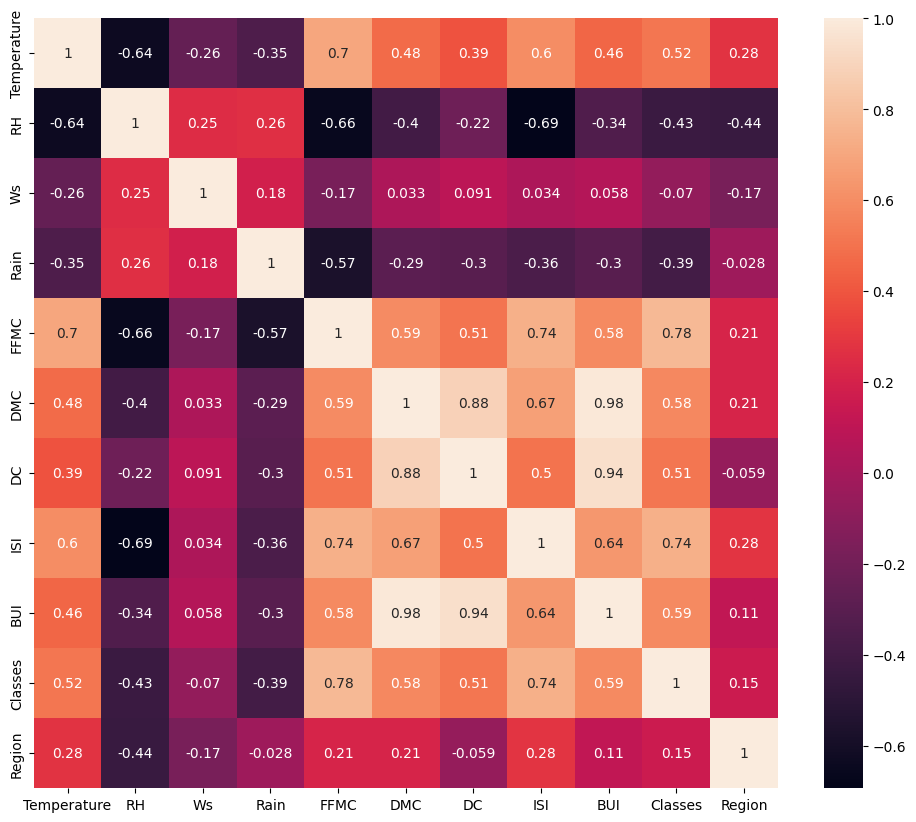

In [ ]:
# prompt: genrate a code for heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True)


In [ ]:
def Correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = Correlation(X_train,0.85)
corr_features


{'BUI', 'DC'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [ ]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.0637002 ,  1.2242641 ,  1.8745098 , ..., -0.96713413,
        -1.10431526, -0.90553851],
       [-0.25481398,  0.17850659,  0.84897638, ...,  0.04571329,
         0.90553851, -0.90553851],
       [ 0.55407225, -1.42498825,  0.50713191, ...,  3.47010218,
         0.90553851,  1.10431526],
       ...,
       [ 2.1718447 , -2.19187709, -0.17655703, ...,  2.89133222,
         0.90553851,  1.10431526],
       [-0.52444272, -1.49470542, -0.17655703, ...,  0.91386822,
         0.90553851,  1.10431526],
       [ 0.55407225, -0.44894791, -0.17655703, ..., -0.72597999,
        -1.10431526,  1.10431526]])

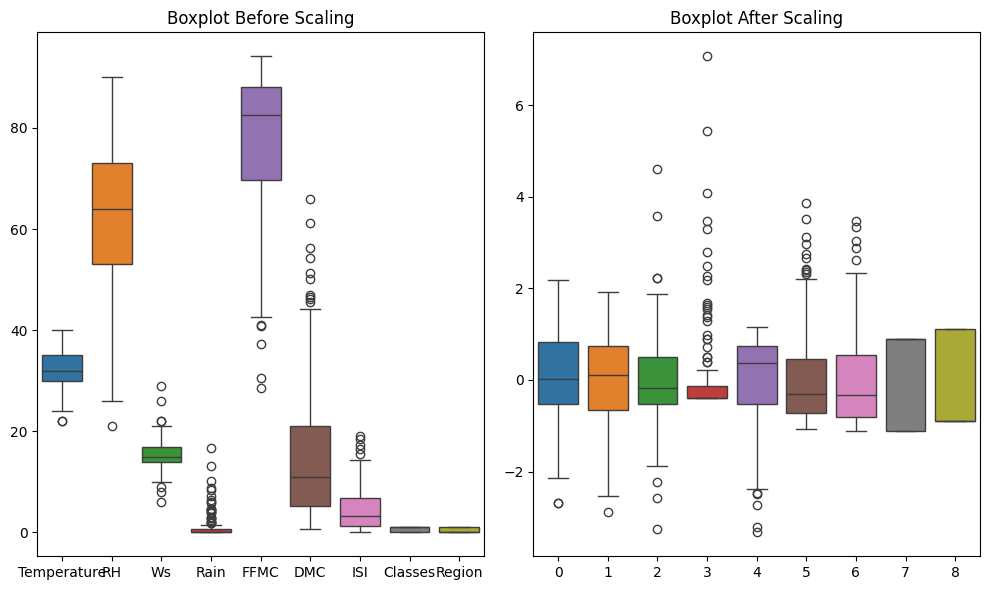

In [ ]:
# prompt: box plot before scaling and after scaling

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame(X_train), orient="v")
plt.title('Boxplot Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(X_train_scaled), orient="v")
plt.title('Boxplot After Scaling')

plt.tight_layout()
plt.show()

**LinearRegression**

****

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test_scaled)

In [ ]:
y_predict

array([-0.34321974, -0.09290843,  8.4254129 ,  0.55087348,  0.18692319,
       10.35477997,  0.91481564, 13.17132208,  1.97380387,  3.48311622,
       20.71221469,  0.1624026 ,  0.63542552,  0.82857307,  0.21216518,
        5.20571983, 10.36102735, 14.43521647,  6.09628654,  7.61388776,
        9.75446988, 22.73132283,  9.70936732,  6.62607148, -0.6624664 ,
        4.53310048,  0.1190363 ,  2.09528258, 14.80602499, 14.29315411,
       11.10362712, 19.26084216,  4.54759347, 14.23743501,  7.82090427,
        4.12423659,  0.20730074, 11.74881559, 12.38116868,  9.55664571,
        4.15763535, 18.97914553, -1.11063869,  2.49846865, 16.29741239,
        4.87331671,  1.16331944,  1.61598097,  3.00983308, -1.12845748,
        0.3357645 ,  2.54561864, 12.1486479 ,  4.92364916, -1.05712797,
        7.02909245, 15.70836028,  3.77716965, 13.64218441, 24.70423187,
        9.38898547])

In [ ]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)

In [ ]:
print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score" , r2)

mse 0.9785475397860567
mae 0.71119096470117
rmse 0.9892156184503238
r2_score 0.9800808228015839


Text(0, 0.5, 'y_predict')

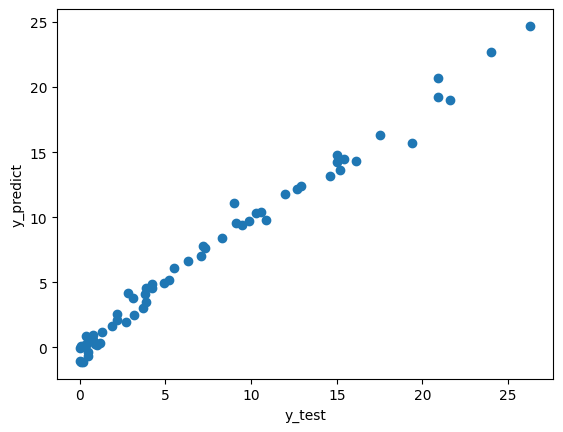

In [ ]:
plt.scatter(y_test,y_predict)
plt.xlabel("y_test")
plt.ylabel("y_predict")

# **LASSO**

In [ ]:
ls = Lasso()
ls.fit(X_train_scaled,y_train)

Lasso()

In [ ]:
y_s_predict = ls.predict(X_test_scaled)
y_s_predict

array([ 1.03570264e+00, -4.07310081e-01,  8.01078121e+00,  2.30564630e+00,
        2.41751765e+00,  1.01589971e+01,  2.08521898e+00,  1.17770255e+01,
        3.47515516e+00,  4.60451442e+00,  1.88725529e+01,  8.12416177e-01,
        1.17388414e+00,  1.18967023e+00,  2.24730773e+00,  5.75251891e+00,
        9.49634641e+00,  1.34873676e+01,  6.38943740e+00,  8.07152268e+00,
        9.01339551e+00,  2.06177825e+01,  9.66701257e+00,  6.77767176e+00,
        8.92259107e-01,  5.17497318e+00,  2.64952201e-01,  3.47229602e+00,
        1.38683933e+01,  1.27333158e+01,  1.08443081e+01,  1.70017342e+01,
        4.76134115e+00,  1.26639969e+01,  7.80328084e+00,  5.55463013e+00,
        6.34541329e-01,  1.14122422e+01,  1.11674514e+01,  9.59918412e+00,
        4.73366228e+00,  1.72990236e+01,  3.26149907e-01,  4.53759845e+00,
        1.53319979e+01,  4.51369119e+00,  2.90618682e+00,  3.38719106e+00,
        4.23778443e+00, -1.66728321e-02,  2.63794498e+00,  4.04321101e+00,
        1.18061948e+01,  

In [ ]:
mse = mean_squared_error(y_test,y_s_predict)
mae = mean_absolute_error(y_test,y_s_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_s_predict)

In [ ]:
print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score" , r2)

mse 2.9213468822132636
mae 1.312061556236978
rmse 1.709194805226503
r2_score 0.9405334704356124


Text(0, 0.5, 'y_s_predict')

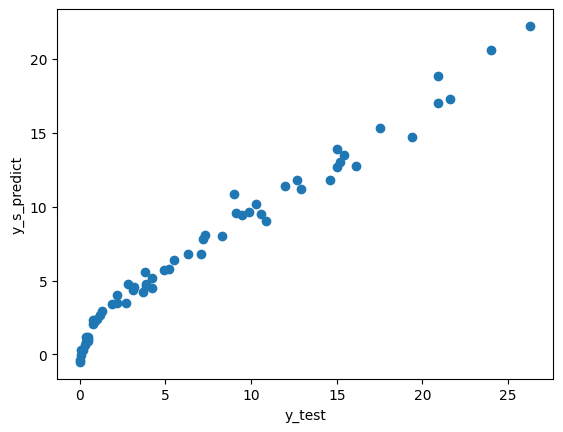

In [ ]:
plt.scatter(y_test,y_s_predict)
plt.xlabel("y_test")
plt.ylabel("y_s_predict")

# **RIDGE REGRESSION MODEL**

In [ ]:
ri  = Ridge()
ri.fit(X_train_scaled,y_train)

Ridge()

In [ ]:
y_r_predict = ri.predict(X_test_scaled)
y_r_predict

array([-0.29444398, -0.20199837,  8.43227519,  0.60516855,  0.21982983,
       10.3756597 ,  0.94002185, 13.15671401,  2.00694752,  3.53112802,
       20.60786334,  0.13744024,  0.67010047,  0.82831685,  0.25480182,
        5.28635633, 10.3694363 , 14.43946445,  6.18027259,  7.63156282,
        9.76079414, 22.60618419,  9.73153569,  6.71855699, -0.69578411,
        4.55608544,  0.08337249,  2.0874082 , 14.78458869, 14.2689084 ,
       11.11254794, 19.1752866 ,  4.57887828, 14.21923518,  7.90391955,
        4.14968649,  0.21774084, 11.75145894, 12.37716287,  9.57707824,
        4.14876381, 18.91907675, -1.12820773,  2.49922746, 16.23608114,
        4.96027419,  1.23720211,  1.66890468,  3.05327264, -1.16694502,
        0.35311726,  2.62161808, 12.13621474,  4.98337282, -1.12070045,
        7.04493597, 15.67905112,  3.89492245, 13.63348963, 24.56668064,
        9.40870342])

In [ ]:
mse = mean_squared_error(y_test,y_r_predict)
mae = mean_absolute_error(y_test,y_r_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_r_predict)

In [ ]:
print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score" , r2)

mse 1.0237518338140317
mae 0.7332774079926213
rmse 1.0118062234509293
r2_score 0.9791606504990003


Text(0, 0.5, 'y_r_predict')

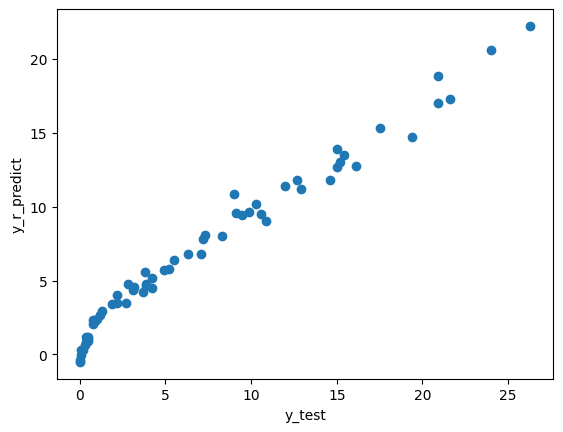

In [ ]:
plt.scatter(y_test,y_s_predict)
plt.xlabel("y_test")
plt.ylabel("y_r_predict")

**CROSS VALIDATION**

In [ ]:
rcv = RidgeCV(cv=5)
rcv.fit(X_train_scaled,y_train)
y_rcv_predict = rcv.predict(X_test_scaled)
y_rcv_predict

array([-0.29444398, -0.20199837,  8.43227519,  0.60516855,  0.21982983,
       10.3756597 ,  0.94002185, 13.15671401,  2.00694752,  3.53112802,
       20.60786334,  0.13744024,  0.67010047,  0.82831685,  0.25480182,
        5.28635633, 10.3694363 , 14.43946445,  6.18027259,  7.63156282,
        9.76079414, 22.60618419,  9.73153569,  6.71855699, -0.69578411,
        4.55608544,  0.08337249,  2.0874082 , 14.78458869, 14.2689084 ,
       11.11254794, 19.1752866 ,  4.57887828, 14.21923518,  7.90391955,
        4.14968649,  0.21774084, 11.75145894, 12.37716287,  9.57707824,
        4.14876381, 18.91907675, -1.12820773,  2.49922746, 16.23608114,
        4.96027419,  1.23720211,  1.66890468,  3.05327264, -1.16694502,
        0.35311726,  2.62161808, 12.13621474,  4.98337282, -1.12070045,
        7.04493597, 15.67905112,  3.89492245, 13.63348963, 24.56668064,
        9.40870342])

Text(0, 0.5, 'y_rcv_predict')

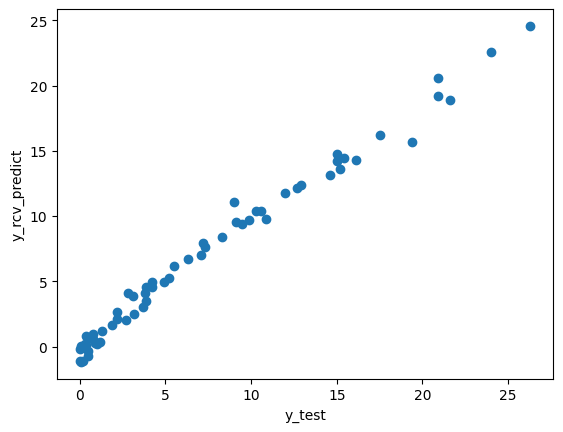

In [ ]:
plt.scatter(y_test,y_rcv_predict)
plt.xlabel("y_test")
plt.ylabel("y_rcv_predict")

In [ ]:
mse = mean_squared_error(y_test,y_rcv_predict)
mae = mean_absolute_error(y_test,y_rcv_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_rcv_predict)

In [ ]:
print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score" , r2)

mse 1.0237518338140317
mae 0.7332774079926213
rmse 1.0118062234509293
r2_score 0.9791606504990003


In [ ]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# **ELASTIC NET REGRESSION**

In [ ]:
el = ElasticNet()
el.fit(X_train_scaled,y_train)
y_el_predict = el.predict(X_test_scaled)
y_el_predict

array([ 1.54145179, -0.87972535,  8.7299011 ,  2.88413887,  2.69206186,
       10.10385981,  2.70520128, 11.5764875 ,  4.61192842,  5.86372482,
       16.7395381 ,  0.82107183,  1.75318302,  1.21672439,  2.76106222,
        7.24630399,  9.59487803, 13.3664863 ,  8.11489359,  8.22611299,
        9.39685241, 18.49017378,  9.8584488 ,  8.46129031,  0.78461409,
        5.38388939,  0.15465853,  3.33496256, 13.03205347, 12.2258759 ,
       10.74588488, 15.21108268,  6.17207624, 12.16603256,  9.42534978,
        5.4732016 ,  0.80436644, 11.35066504, 11.23009235,  9.81008914,
        4.02897552, 15.68029689,  0.66130989,  3.72759208, 14.13137966,
        6.4468903 ,  3.61812167,  3.45582266,  5.36895097, -0.08196263,
        2.6473657 ,  4.73055443, 11.86400144,  7.05388007, -0.79272347,
        7.08201593, 13.33726591,  6.67935054, 12.55897355, 19.20181752,
        9.78893138])

In [ ]:
mse = mean_squared_error(y_test,y_el_predict)
mae = mean_absolute_error(y_test,y_el_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_el_predict)

In [ ]:
print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score" , r2)

mse 6.140814077628993
mae 1.9160987236859597
rmse 2.4780666007250476
r2_score 0.8749984453677508


Text(0, 0.5, 'y_el_predict')

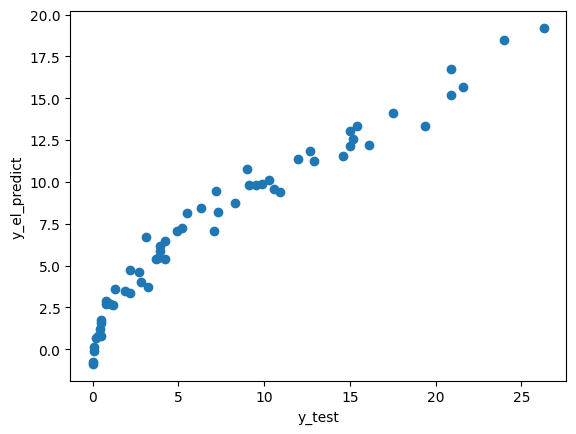

In [ ]:
plt.scatter(y_test,y_el_predict)
plt.xlabel("y_test")
plt.ylabel("y_el_predict")

**ELASTIC NET CV**

In [ ]:
elcv = ElasticNetCV(cv=5)
elcv.fit(X_train_scaled,y_train)
y_elcv_predict = elcv.predict(X_test_scaled)
y_elcv_predict

array([-0.13043167, -0.78381192,  8.45432506,  0.87207792,  0.61338644,
       10.51233166,  1.06355942, 12.97738528,  2.3971488 ,  3.85244264,
       20.24297744,  0.04924817,  0.66895557,  0.742655  ,  0.57564714,
        5.5132089 , 10.38236349, 14.33292639,  6.32120272,  7.88723025,
        9.72224531, 22.09984873,  9.84688835,  6.85630184, -0.5287771 ,
        4.63324701, -0.15511077,  2.30761097, 14.71257486, 14.07955978,
       11.19568421, 18.86771325,  4.68964423, 14.05728393,  7.97571914,
        4.37565932,  0.1582838 , 11.77506242, 12.26892655,  9.72631865,
        4.27727295, 18.66715408, -1.17851623,  2.93783338, 16.10546018,
        5.00148794,  1.55664638,  2.06186662,  3.41065823, -1.30221113,
        0.76081274,  2.89397656, 12.07137765,  5.23199843, -1.48098912,
        7.23895575, 15.68110497,  4.08906902, 13.62225012, 24.10832497,
        9.51564649])

In [ ]:
mse = mean_squared_error(y_test,y_elcv_predict)
mae = mean_absolute_error(y_test,y_elcv_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_elcv_predict)

print("mse" , mse)
print("mae" , mae)
print("rmse" , rmse)
print("r2_score_ELCV" , r2)



mse 1.1995442836504338
mae 0.7974690308105894
rmse 1.095237090154654
r2_score_ELCV 0.9755822439157079


Text(0, 0.5, 'y_elcv_predict')

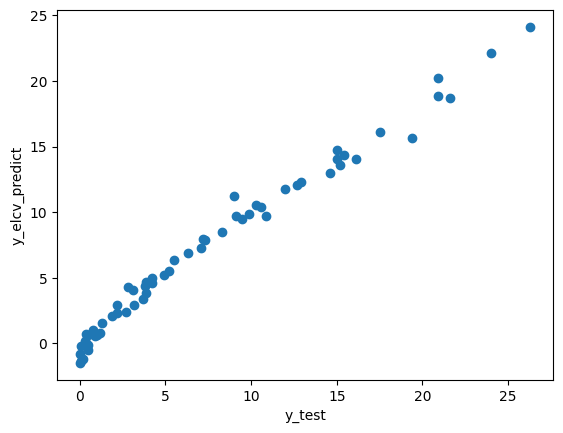

In [ ]:
plt.scatter(y_test,y_elcv_predict)
plt.xlabel("y_test")
plt.ylabel("y_elcv_predict")

**PICKLING**

~ Picklig the best ML model amongst the above

In [ ]:
scalar ## for preprocessing

StandardScaler()

In [ ]:
ri ## model training

Ridge()

In [ ]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ri,open('ri.pkl','wb'))